In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


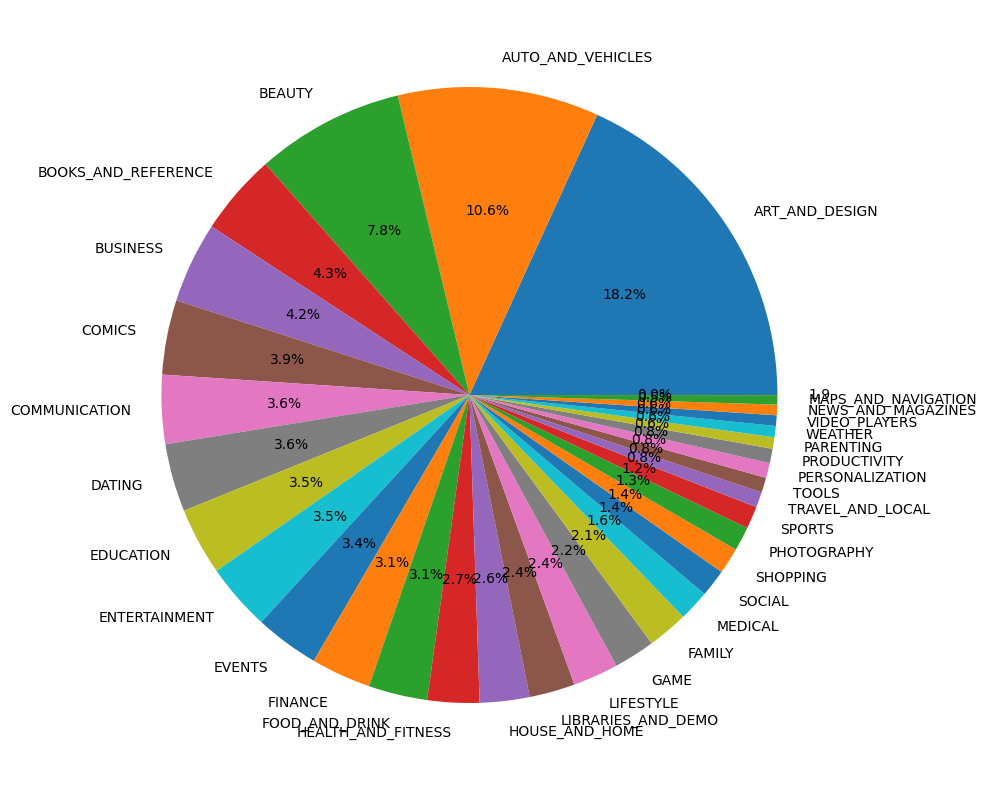

In [3]:
x = plt.figure(figsize=(10,10))
plt.pie(df["Category"].value_counts(),autopct='%1.1f%%',labels=df["Category"].unique())
plt.show()

In [4]:
c=0
for i in df["Rating"]:
    if i >=4.5:
        c+=1
print(c ,"apps have rating more than 4.5")
print(sum(df["Rating"]>=4.5) ,"apps have rating more than 4.5")

2956 apps have rating more than 4.5
2956 apps have rating more than 4.5


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df.iloc[:,:])
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
df = pd.read_csv("googleplaystore.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[:,2:3] = imputer.fit_transform(df.iloc[:,2:3])
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
x = df[df["Category"]=="ART_AND_DESIGN"]
len(x[x["Type"]=="Free"])

61

In [17]:
x = df[df["Category"]=="ART_AND_DESIGN"]
x[x["Type"]=="Free"].sort_values(by="Rating",ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,253,3.7M,"50,000+",Free,0,Everyone,Art & Design,"November 1, 2017",1.0.0,4.0 and up
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,"5,000+",Free,0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1.9M,"5,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
43,Paint Splash!,ART_AND_DESIGN,3.8,2206,1.2M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [18]:
df.groupby("Category").mean()["Rating"].sort_values(ascending=False) #Average rating of each category

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_15644\2682723085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Category").mean()["Rating"].sort_values(ascending=False)


Category
EDUCATION              4.387778
ART_AND_DESIGN         4.368438
EVENTS                 4.363647
BOOKS_AND_REFERENCE    4.311537
PERSONALIZATION        4.306873
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
SOCIAL                 4.248001
WEATHER                4.239675
SPORTS                 4.218404
PRODUCTIVITY           4.208287
HOUSE_AND_HOME         4.196819
FAMILY                 4.192490
PHOTOGRAPHY            4.192179
AUTO_AND_VEHICLES      4.190824
MEDICAL                4.190167
LIBRARIES_AND_DEMO     4.182938
FOOD_AND_DRINK         4.170709
COMMUNICATION          4.163842
COMICS                 4.156445
BUSINESS               4.145987
NEWS_AND_MAGAZINES     4.142993
FINANCE                4.139108
ENTERTAINMENT          4.126174
TRAVEL_AND_LOCAL       4.119716
LIFESTYLE              4.112427
VIDEO_PLAYERS          4.074858
TOOLS                  4.065970

In [24]:
df_pr = df[df["Type"]=="Paid"]
df_pr.groupby("Category").count()["Type"].sort_values(ascending=False) #Number of apps in each category

Category
FAMILY                 190
MEDICAL                109
GAME                    83
PERSONALIZATION         82
TOOLS                   77
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            28
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             22
LIFESTYLE               19
FINANCE                 17
HEALTH_AND_FITNESS      16
BUSINESS                14
TRAVEL_AND_LOCAL        12
WEATHER                  8
DATING                   7
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
AUTO_AND_VEHICLES        3
SOCIAL                   3
ART_AND_DESIGN           3
NEWS_AND_MAGAZINES       2
PARENTING                2
FOOD_AND_DRINK           2
SHOPPING                 2
ENTERTAINMENT            2
LIBRARIES_AND_DEMO       1
EVENTS                   1
Name: Type, dtype: int64

In [29]:
df = pd.DataFrame(index =  [ 'r1', 'r2', 'r3', 'row4', 'row5', 'row6', 'r7', 'r8', 'r9', 'row10'])
g = df.groupby(df.index.str.len())
g.filter(lambda x: len(x) > 2)

""
r1
r2
r3
row4
row5
row6
r7
r8
r9
